In [19]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set_theme(color_codes=True)

In [20]:
df = pd.read_csv('CVD_cleaned.csv')

In [21]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [22]:
df.select_dtypes(include='object').nunique()

General_Health      5
Checkup             5
Exercise            2
Heart_Disease       2
Skin_Cancer         2
Other_Cancer        2
Depression          2
Diabetes            4
Arthritis           2
Sex                 2
Age_Category       13
Smoking_History     2
dtype: int64

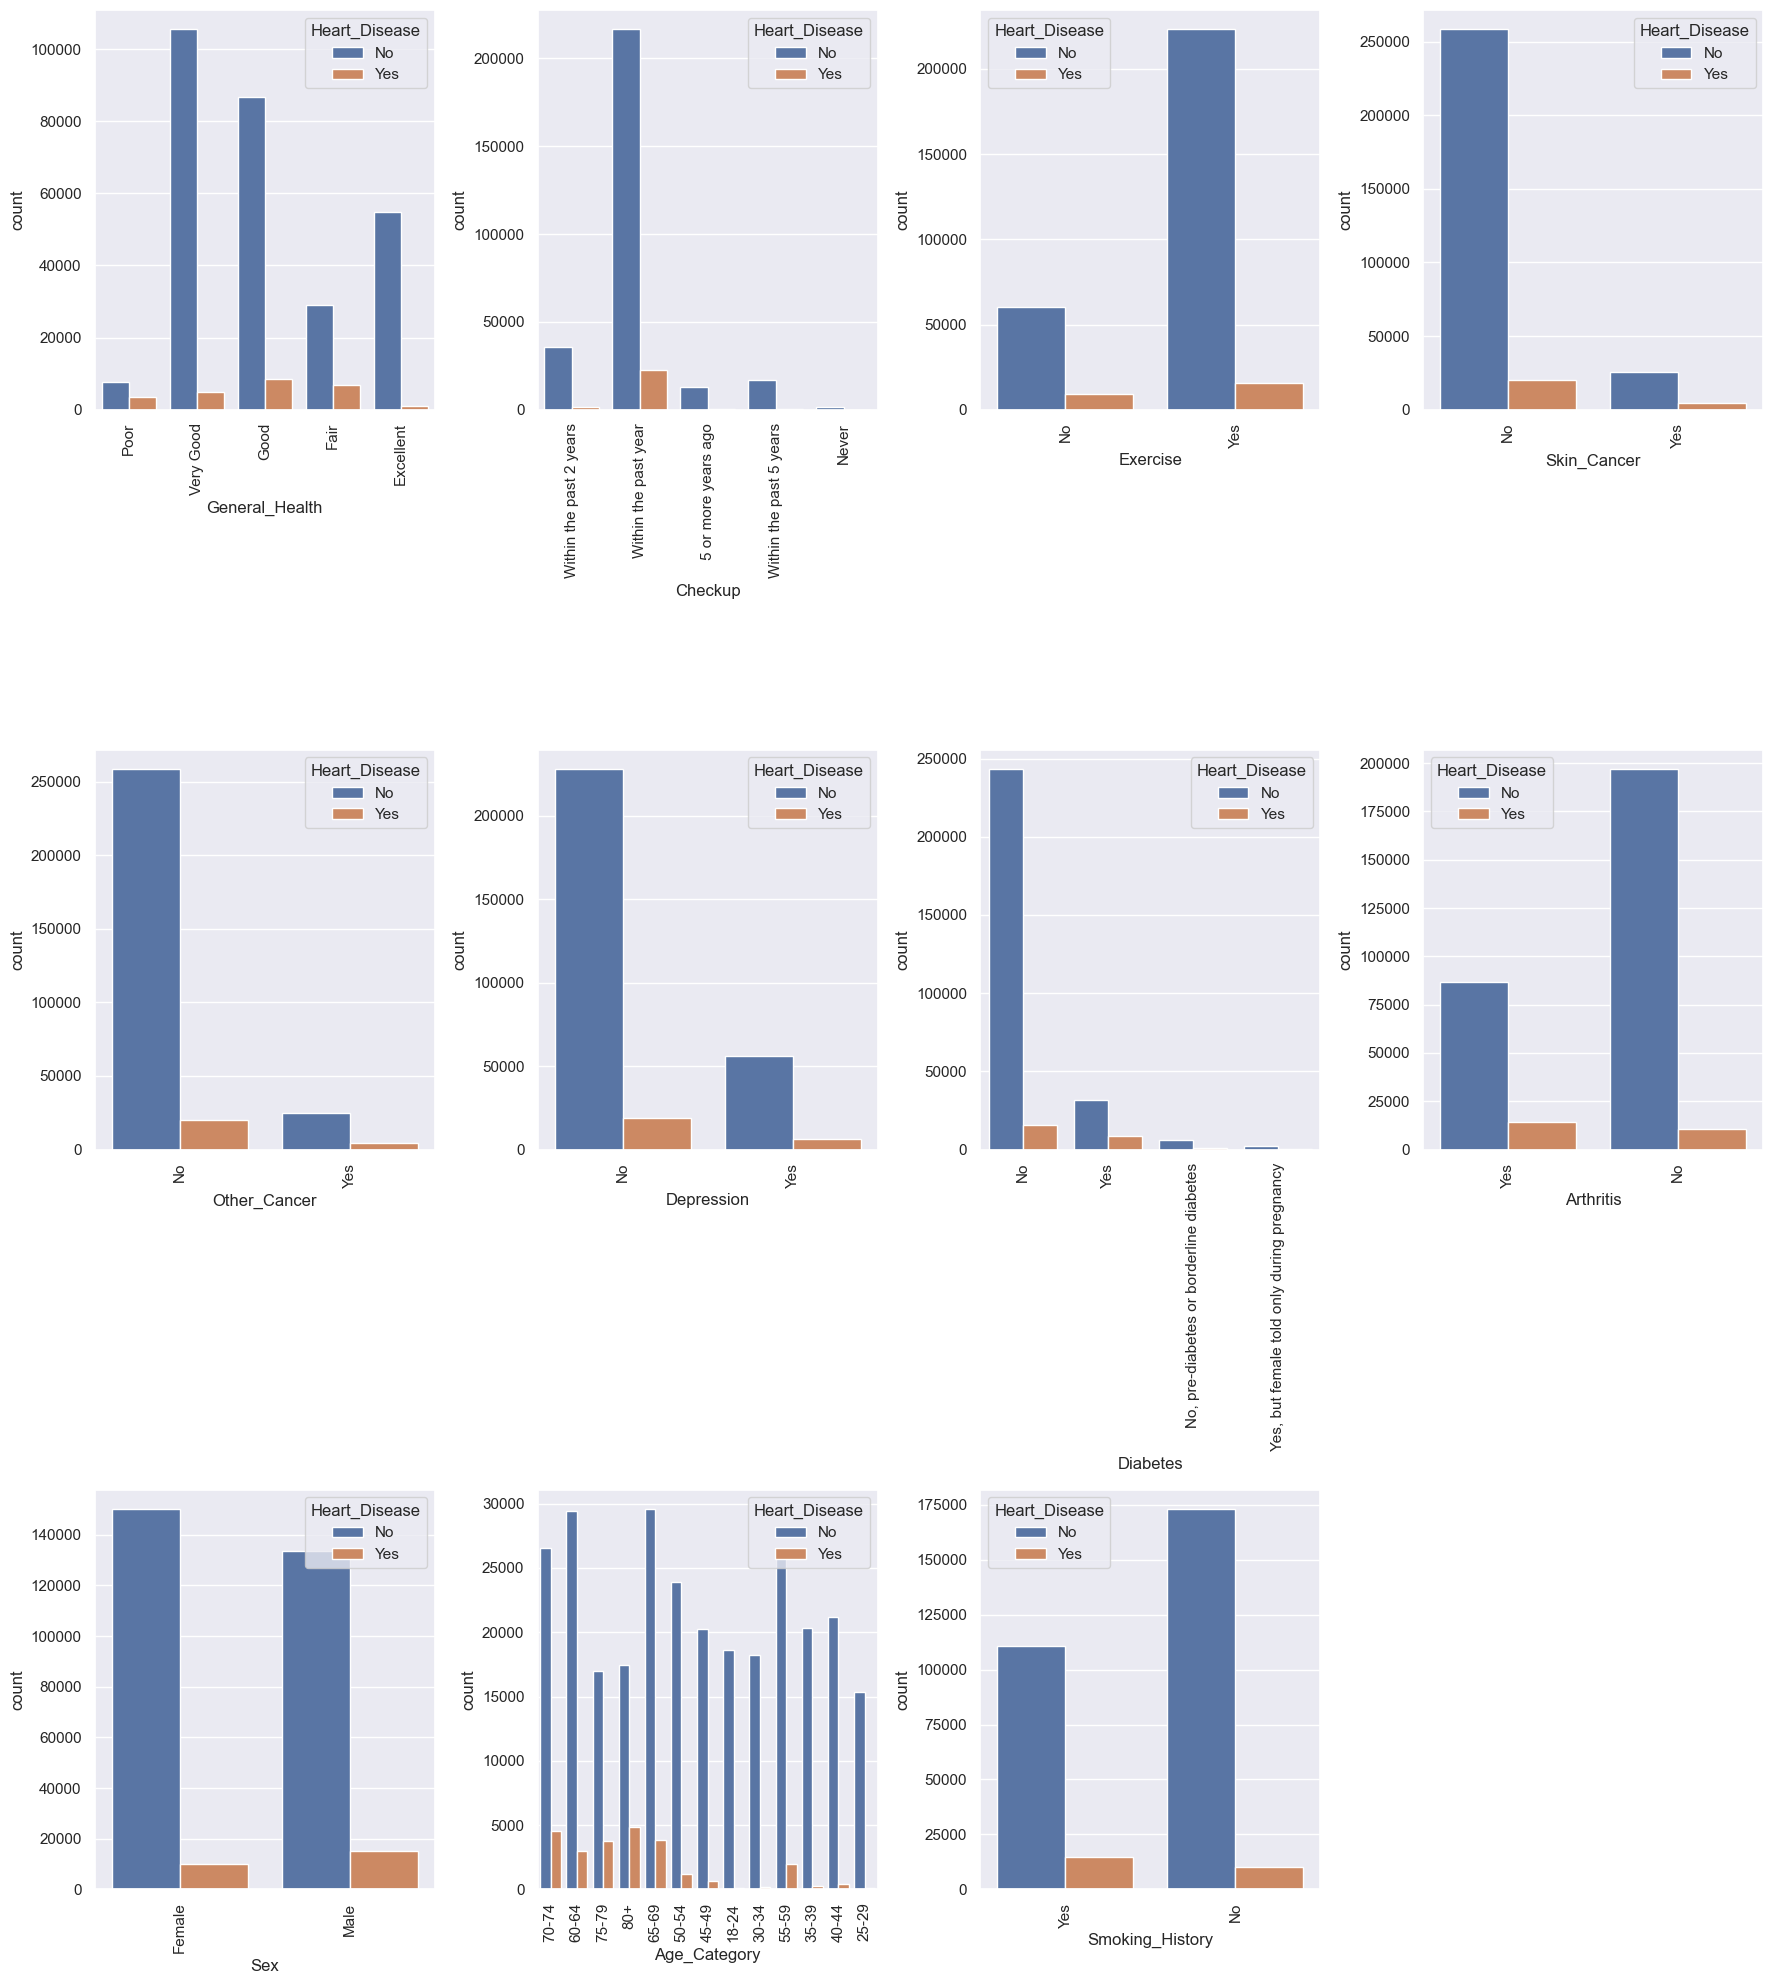

In [23]:
cat_vars = ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(18,20))
axs = axs.flatten()

for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Heart_Disease', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

fig.tight_layout()

fig.delaxes(axs[11])

plt.show()    

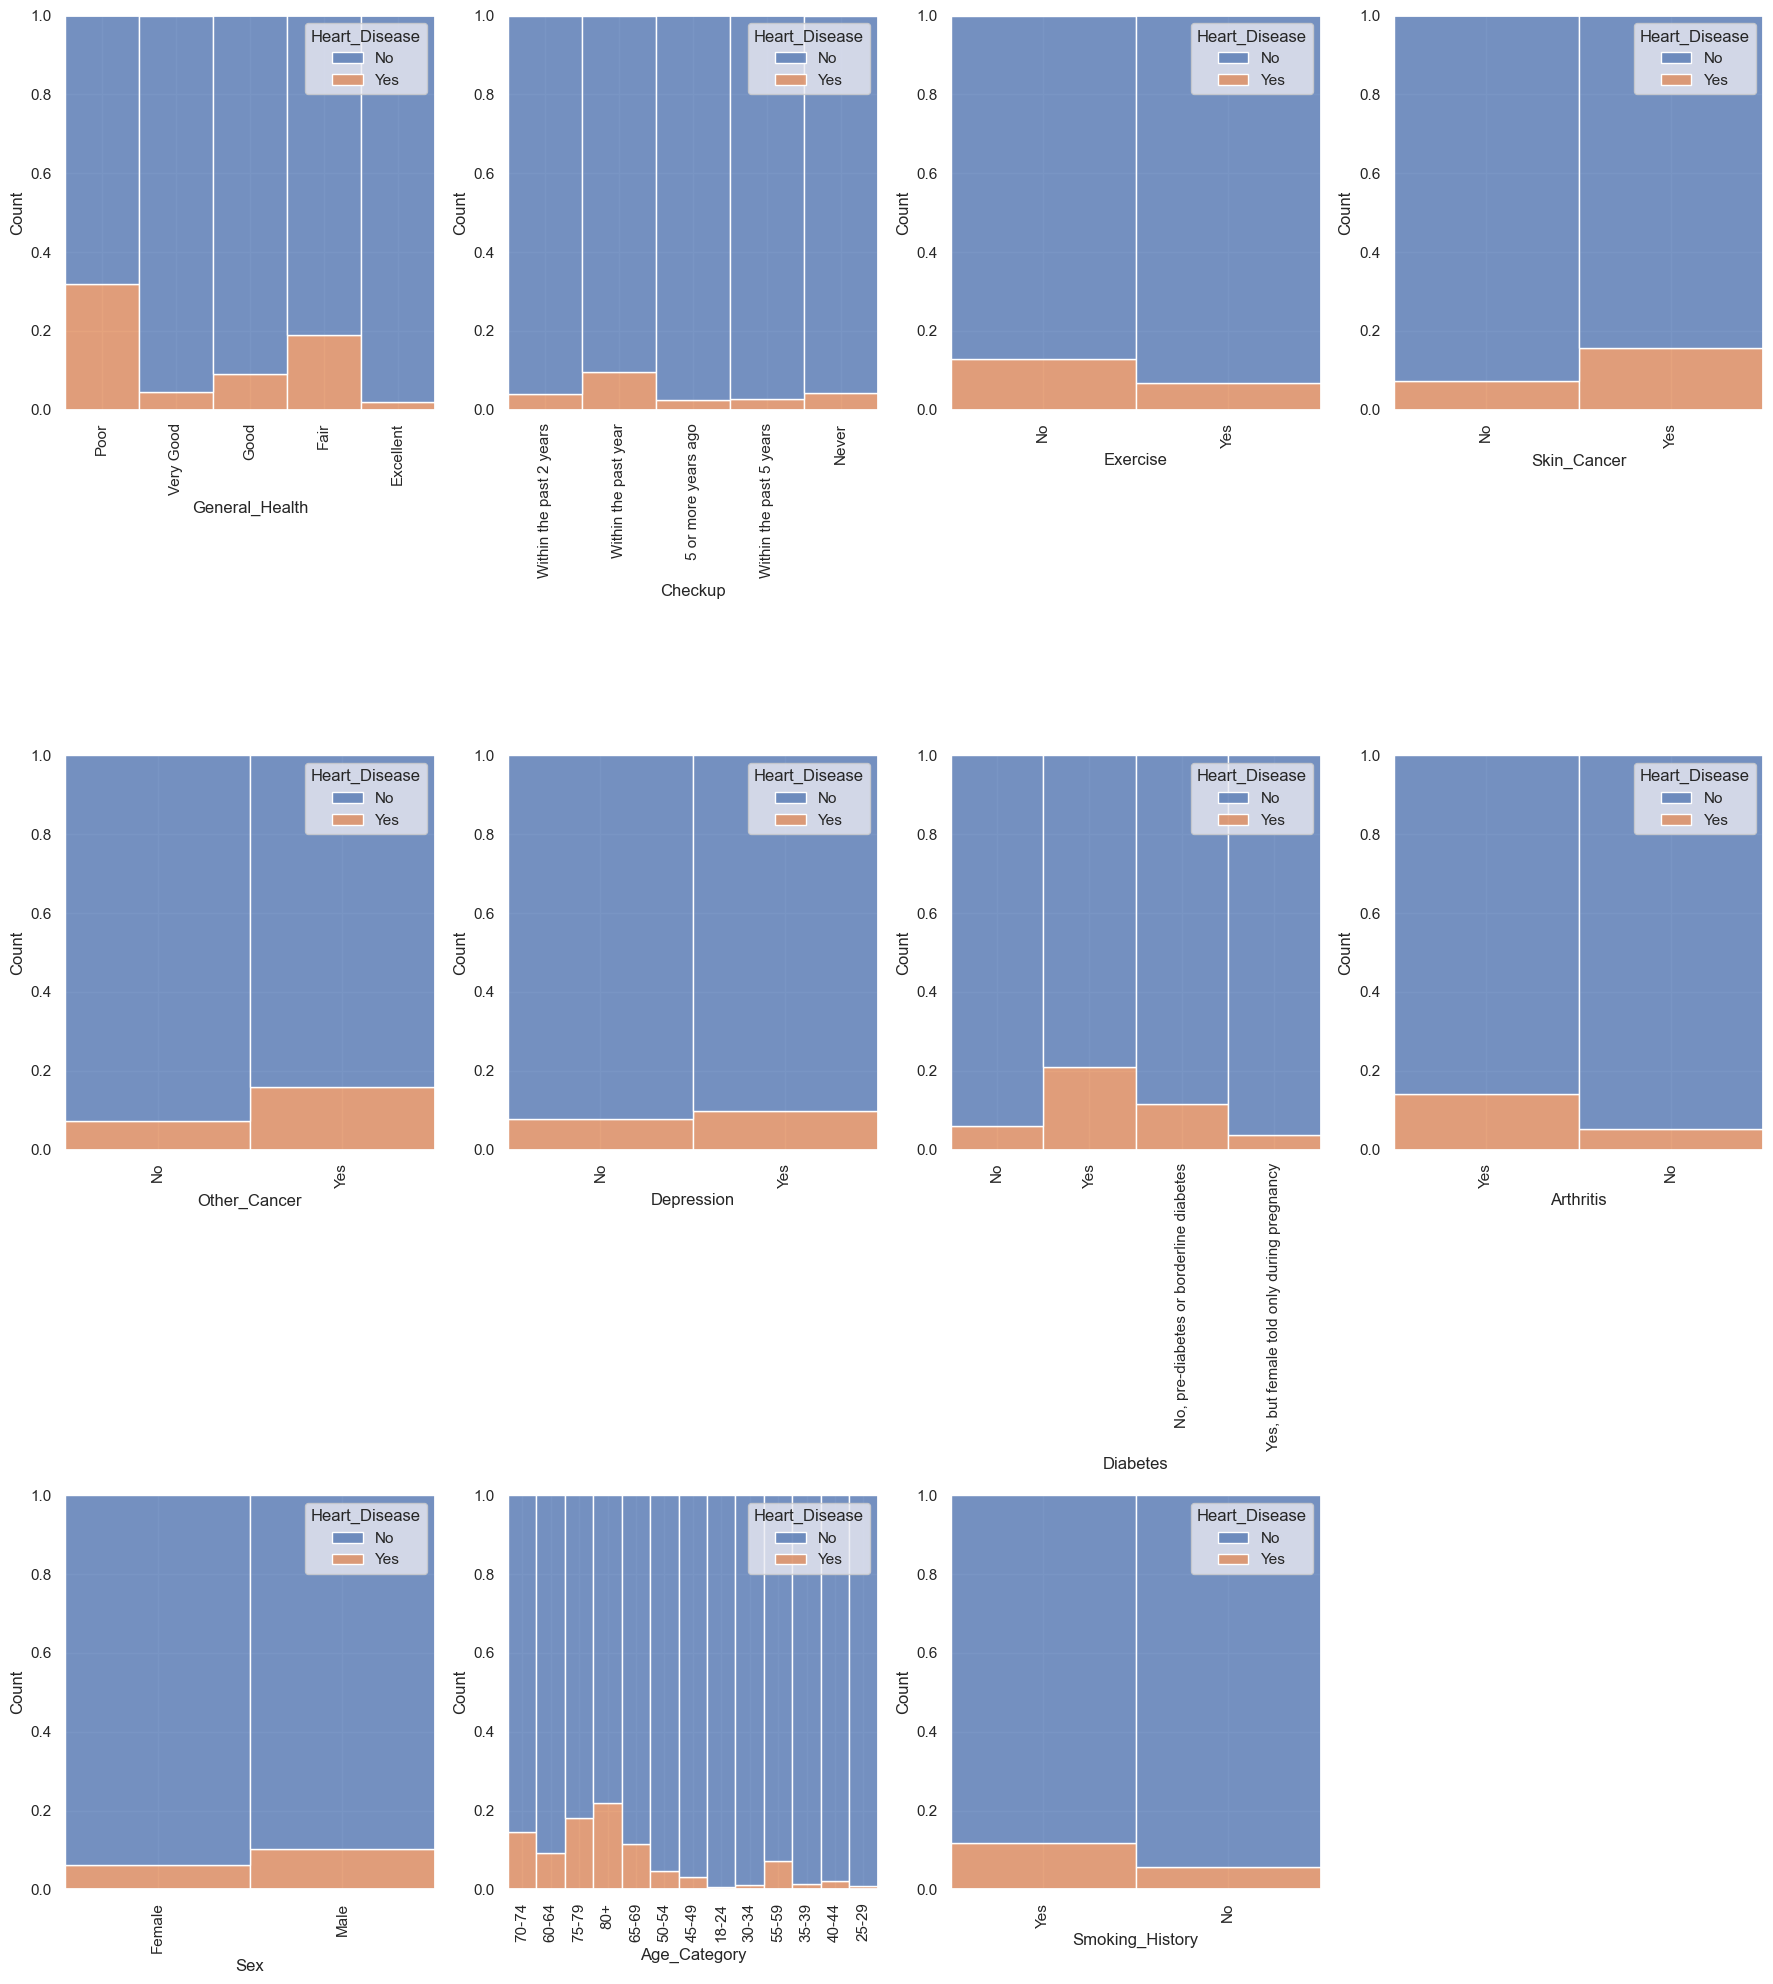

In [24]:
import  warnings
warnings.filterwarnings("ignore")

cat_vars = ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(18,20))
axs = axs.flatten()

for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='Heart_Disease', data=df, ax=axs[i], multiple="fill", kde=False, element='bars')
    axs[i].set_xticklabels(df[var].unique(), rotation=90)

fig.tight_layout()

fig.delaxes(axs[11])

plt.show() 

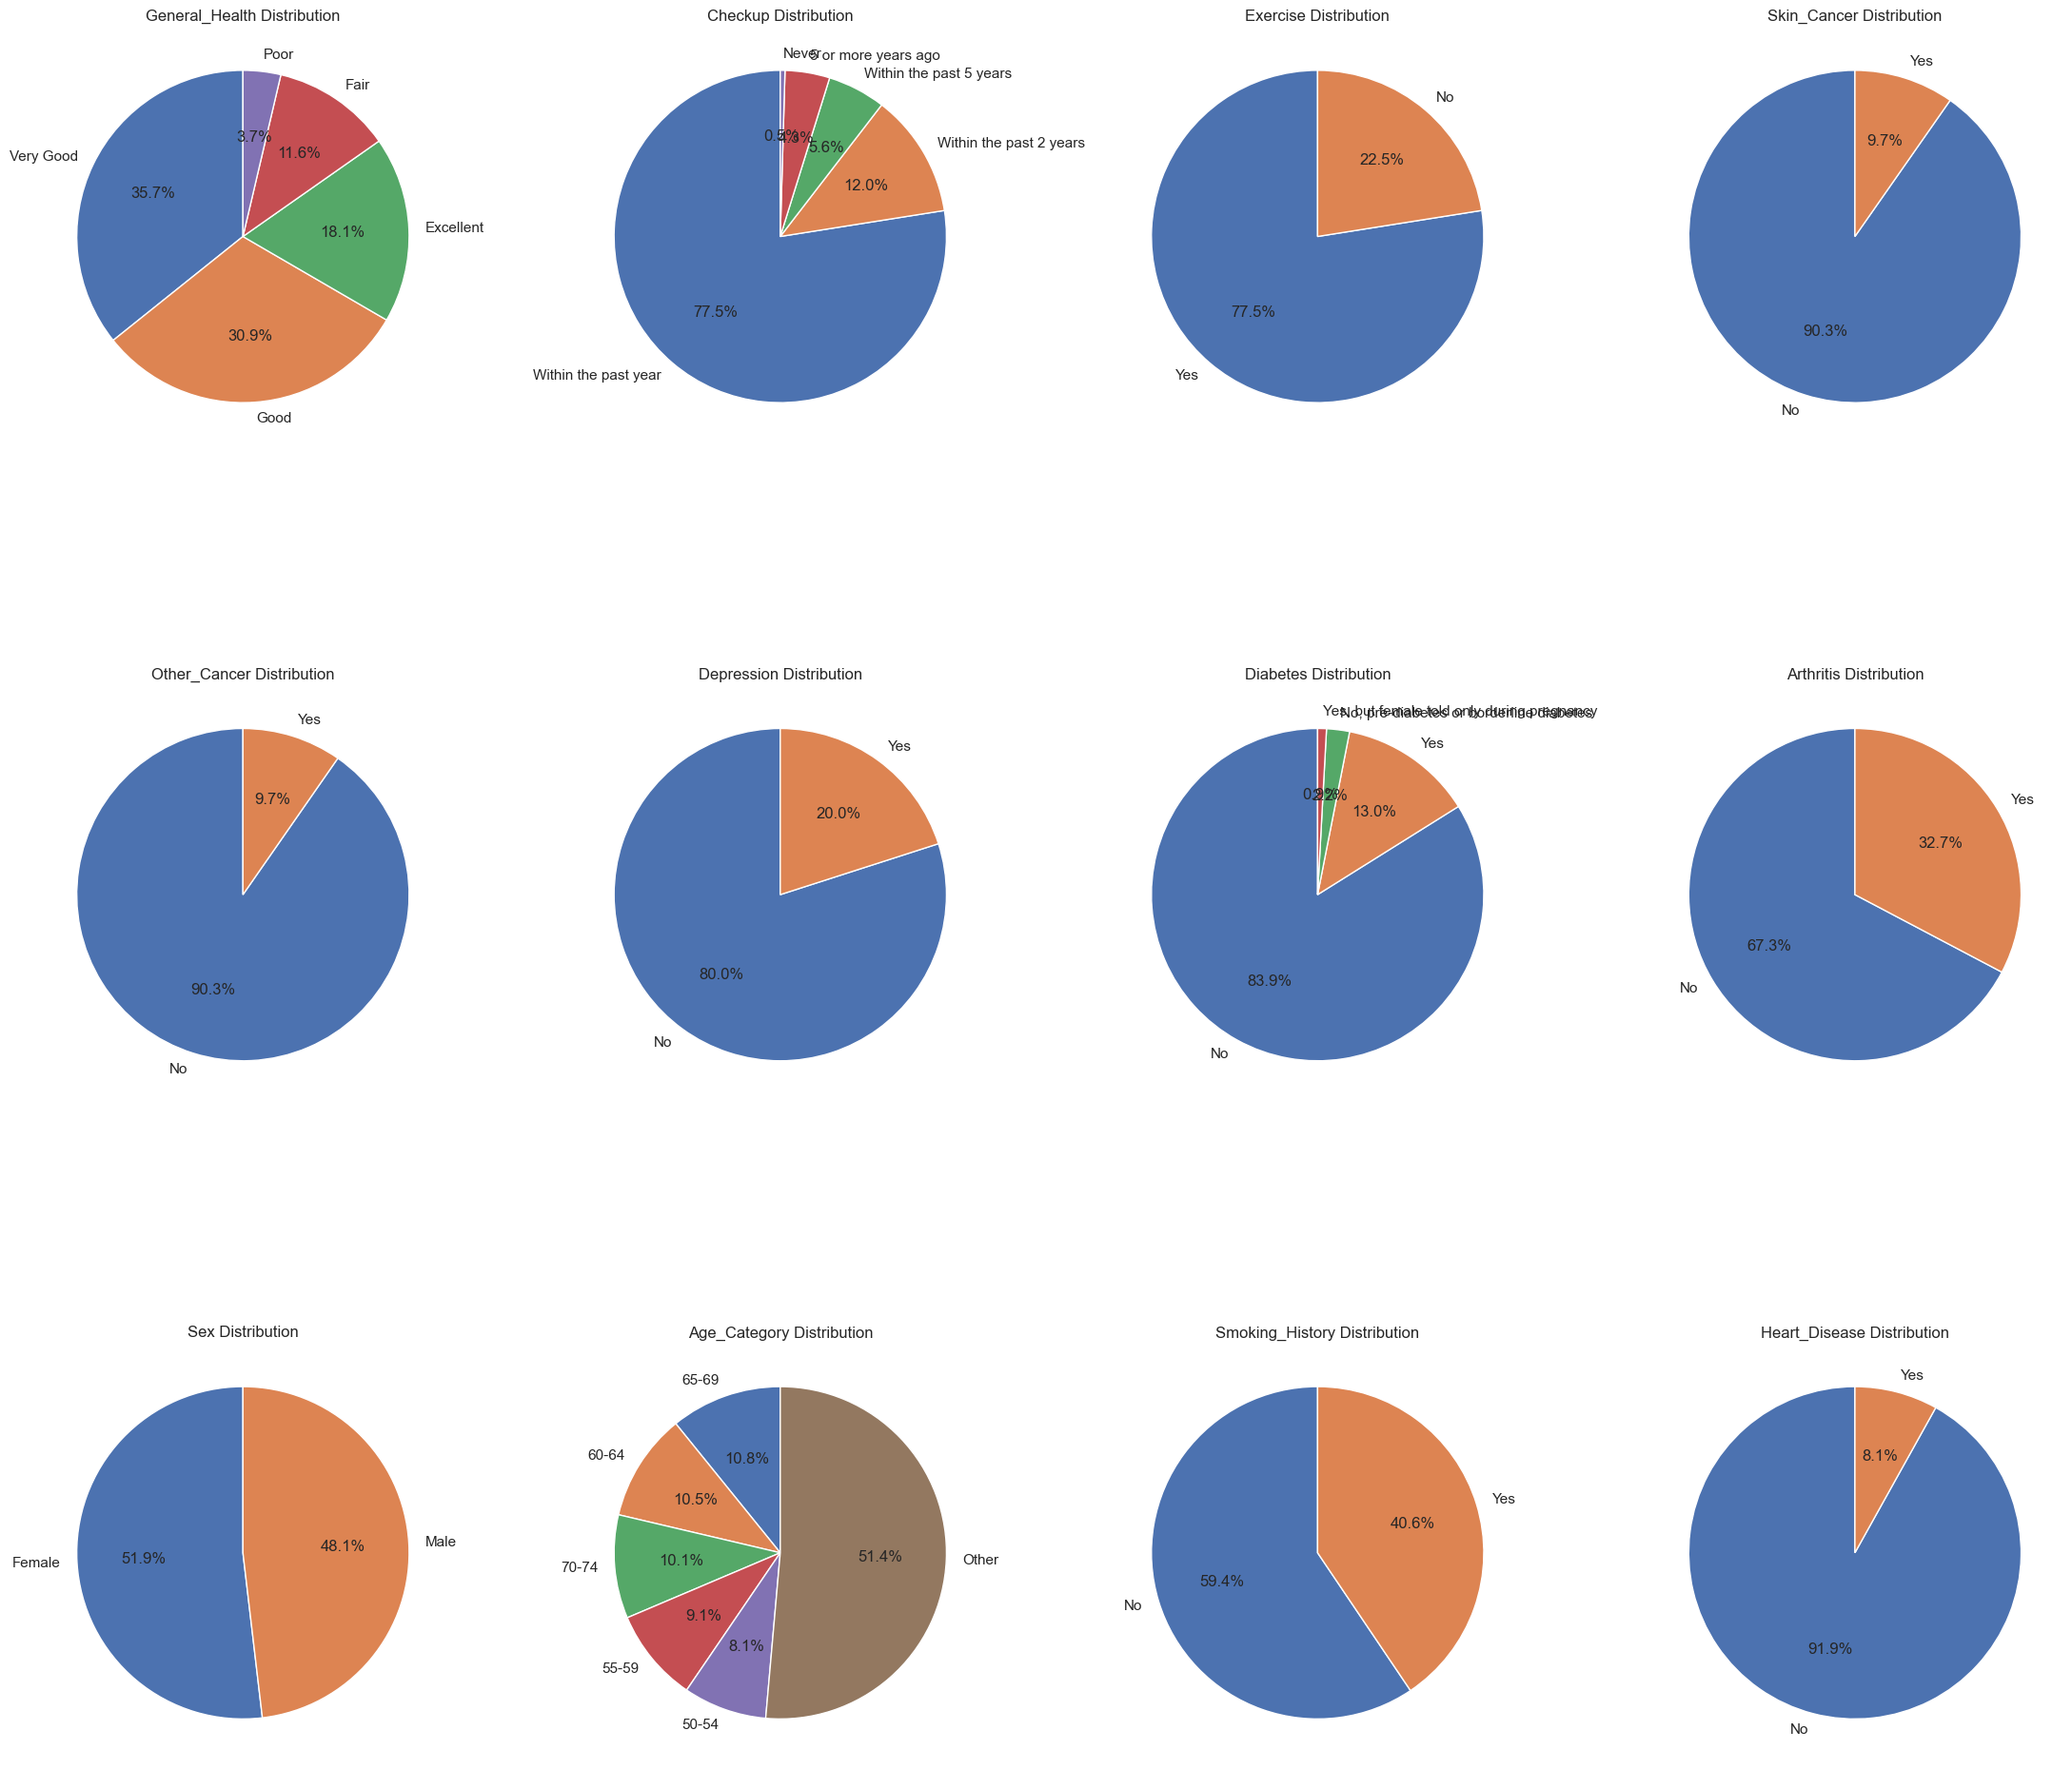

In [25]:
max_categories = 5

cat_vars = ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer',
            'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History', 'Heart_Disease']

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(22, 22))

for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        cat_counts = df[var].value_counts()

        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            cat_counts = cat_counts_top.append(cat_counts_other)

        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        axs.flat[i].set_title(f'{var} Distribution')

fig.tight_layout()

plt.show()

In [26]:
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [27]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"{column}: {df[column].unique()}" )

General_Health: ['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']
Checkup: ['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']
Exercise: ['No' 'Yes']
Heart_Disease: ['No' 'Yes']
Skin_Cancer: ['No' 'Yes']
Other_Cancer: ['No' 'Yes']
Depression: ['No' 'Yes']
Diabetes: ['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']
Arthritis: ['Yes' 'No']
Sex: ['Female' 'Male']
Age_Category: ['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']
Smoking_History: ['Yes' 'No']


In [28]:
from sklearn import preprocessing

for column in df.select_dtypes(include=['object']).columns:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(df[column].unique())
    df[column] = label_encoder.transform(df[column])
    print(f"{column}: {df[column].unique()}")

General_Health: [3 4 2 1 0]
Checkup: [2 4 0 3 1]
Exercise: [0 1]
Heart_Disease: [0 1]
Skin_Cancer: [0 1]
Other_Cancer: [0 1]
Depression: [0 1]
Diabetes: [0 2 1 3]
Arthritis: [1 0]
Sex: [0 1]
Age_Category: [10  8 11 12  9  6  5  0  2  7  3  4  1]
Smoking_History: [1 0]


<Axes: >

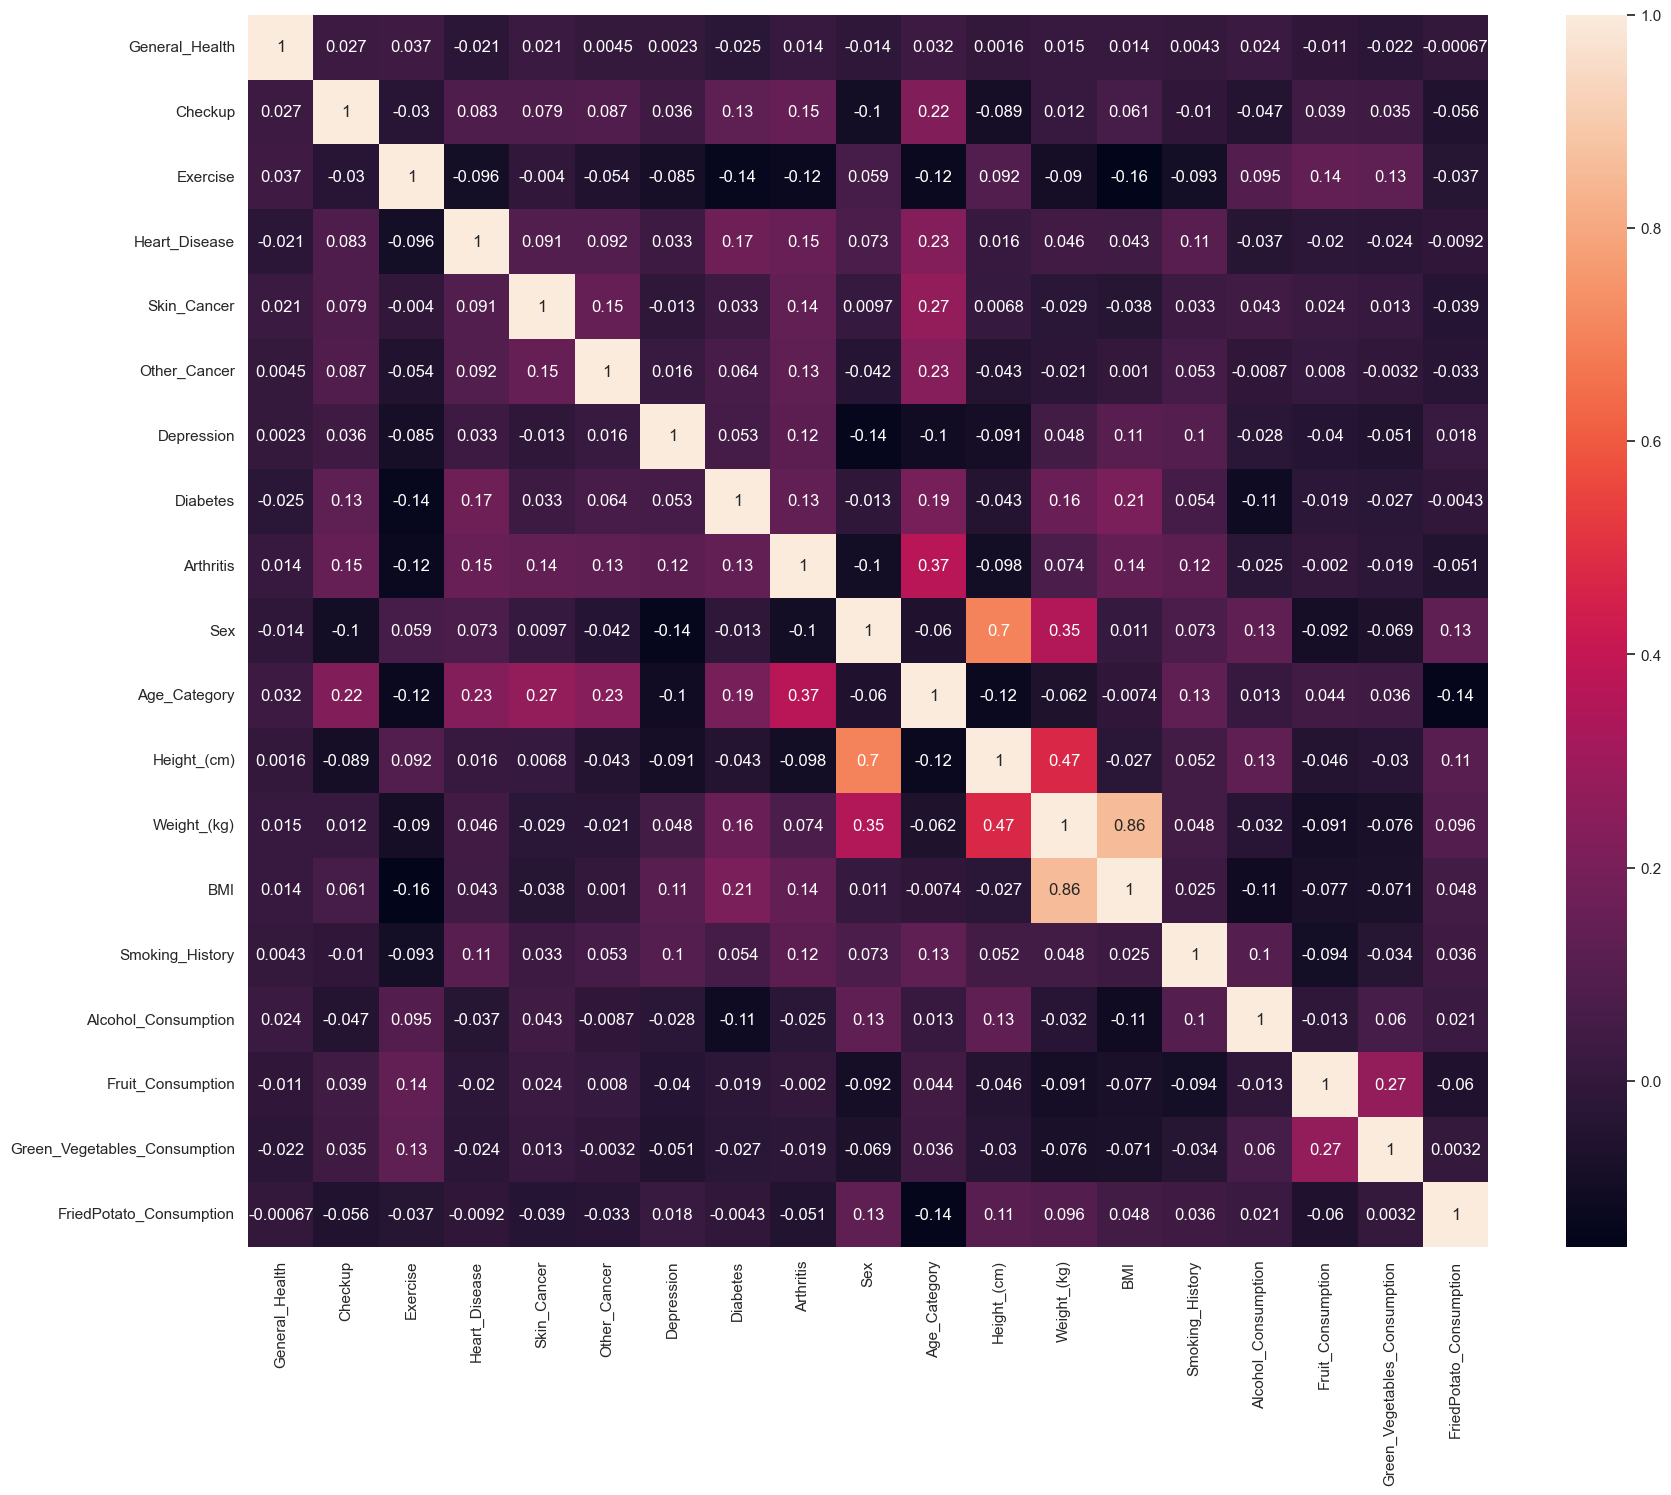

In [29]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

In [30]:
from sklearn.model_selection import train_test_split

X = df.drop('Heart_Disease', axis=1)
y = df['Heart_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
selected_columns = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 
            'Fruit_Consumption','Green_Vegetables_Consumption', 'FriedPotato_Consumption']

Q1 = X_train[selected_columns].quantile(0.25)
Q3 = X_train[selected_columns].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5

outlier_indices = np.where(
    (X_train[selected_columns] < (Q1 - threshold * IQR)) |
    (X_train[selected_columns] > (Q3 + threshold * IQR))
)[0]

X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=12, min_samples_leaf=2, min_samples_split=2, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=12,
                       min_samples_leaf=2, random_state=0)

In [33]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 71.45 %


In [34]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))

F-1 Score :  0.7144938563403539
Precision Score :  0.7144938563403539
Recall Score :  0.7144938563403539
Jaccard Score :  0.5558074225194253


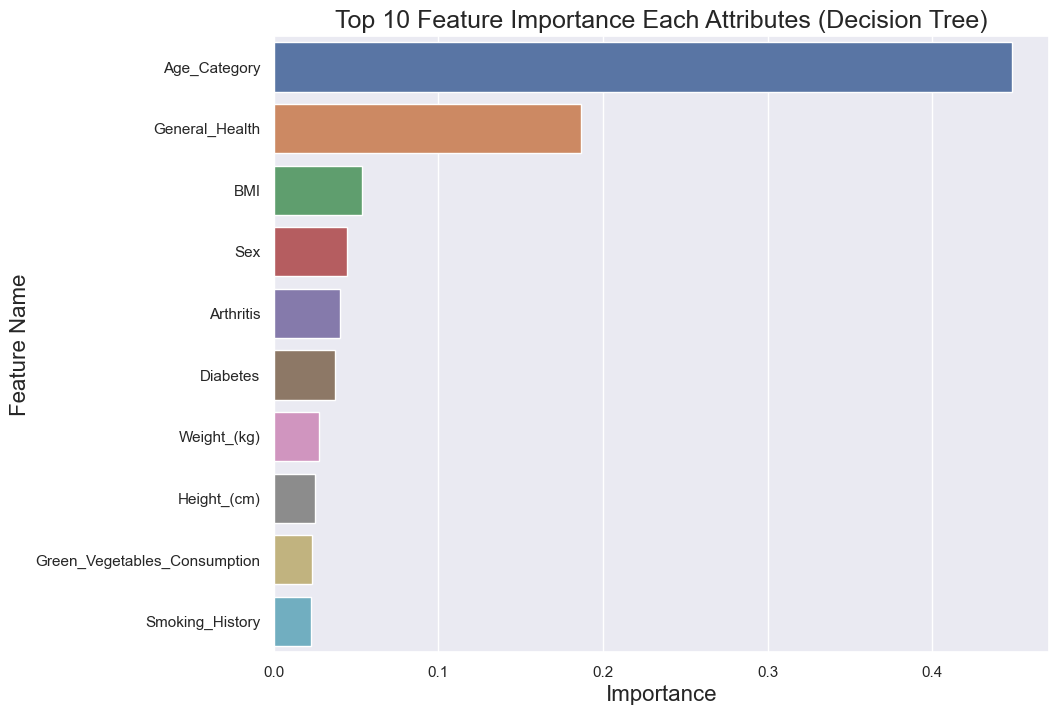

In [35]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.7144938563403539')

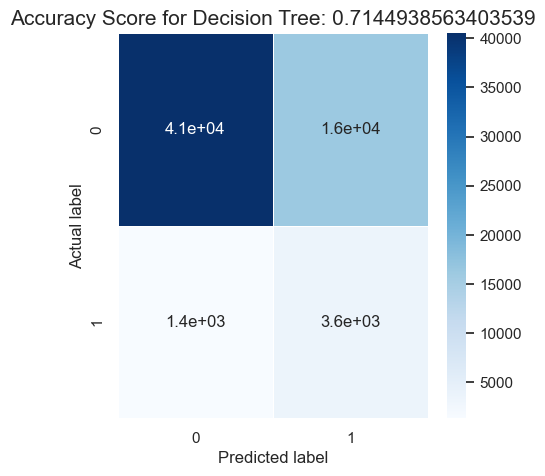

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)